In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import pypomp
#import seaborn as sns
from plotnine import ggplot, geom_line, aes, facet_wrap

### Notes about pkl structure:

- Dictionary with two entries
    - fit_out: A list containing output of the fitting step. Each entry is a replicate from the fitting step.
        - Various entries: A tuple of length 2 containing information for a replicate.
            - Entry 0: A JAX array containing the iterated filtering estimate of the log likelihood for each iteration (plus an extra? check when the extra is added)
            - Entry 1: A JAX array containing parameters from particles. First dimension varies iteration, second varies the particle, and the third varies the parameter.
    - pf_out: A list containing the output of the particle filtering step. 
        - Various entries: A list for a different replicate from the particle filtering step.
            - Entry 0: A numpy.float32 representing the estimated log likelihood.
            - Entry 1: A numpy.float32 representing the estimated standard deviation of the LL estimate.


In [4]:
PKL_PATH = "C:/Users/ravis/OneDrive/Documents/danny_honors_thesis/src/1d_global_out.pkl"
pkl_in = pickle.load(open(PKL_PATH, "rb"))

### Final LL estimates:

In [5]:
pd.DataFrame({
    "LL": [x[0] for x in pkl_in["pf_out"]],
    "sd": [x[1] for x in pkl_in["pf_out"]]
})

,LL,sd
0,-11470.391602,0.000000
1,-11461.661133,0.000000
2,-11484.104492,0.000977


### Plot traces

In [6]:

traces = pd.DataFrame()
for rep in range(len(pkl_in["fit_out"])):
    for iter in range(pkl_in["fit_out"][rep][1].shape[0]):
        for param in range(pkl_in["fit_out"][rep][1].shape[2]):
            param_avg = float(np.mean(pkl_in["fit_out"][rep][1][iter,:,param]))
            traces = pd.concat([
                traces, 
                pd.DataFrame({
                    "rep":str(rep), 
                    "iter":iter, 
                    "param_index": param,
                    "param_value":param_avg
                }, index = [0])
            ], ignore_index = True)
traces

,rep,iter,param_index,param_value
0,0,0,0,-10.572877
1,0,0,1,-5.174261
2,0,0,2,-9.048823
3,0,0,3,-8.123345
4,0,0,4,0.407337
...,...,...,...,...
3613,2,200,1,-4.091854
3614,2,200,2,-9.421676
3615,2,200,3,-6.929587
3616,2,200,4,0.926285


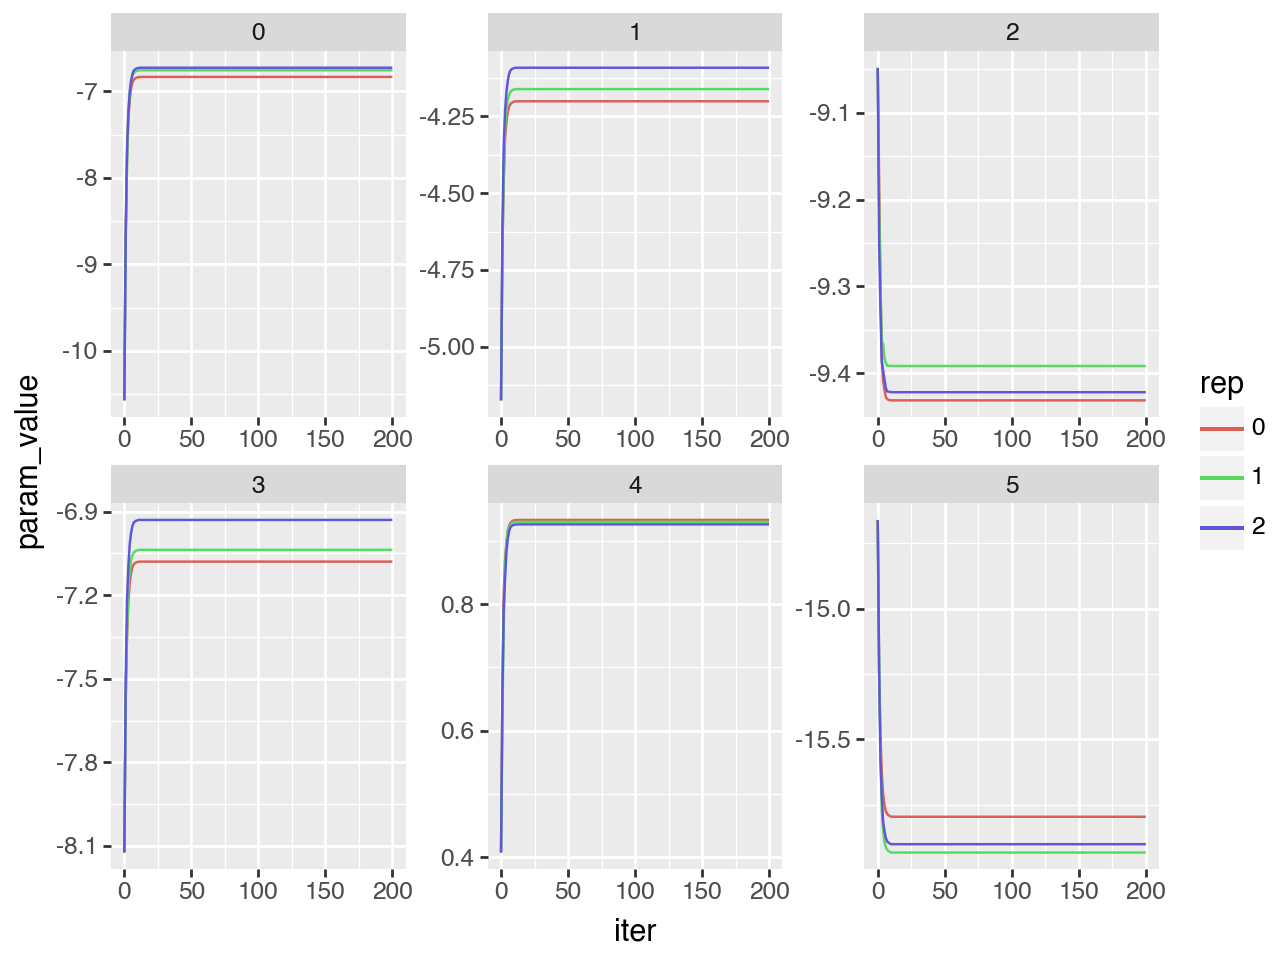

In [58]:
(
    ggplot(traces, aes(x = "iter", y = "param_value", group = "rep", color = "rep")) 
    + geom_line()
    + facet_wrap("param_index", scales = "free")
)